# XFROG Signal Spectrogram Data

Use this notebook to model and XFROG Spectrogram and reconstruct the pulse from the spectrogram using the FROG algorithm.

In [2]:
from whitepeaks import *

# Frog Real Data

### SHG FROG Laser

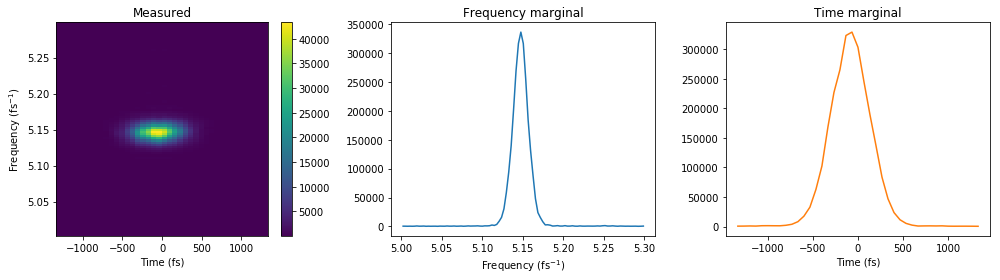

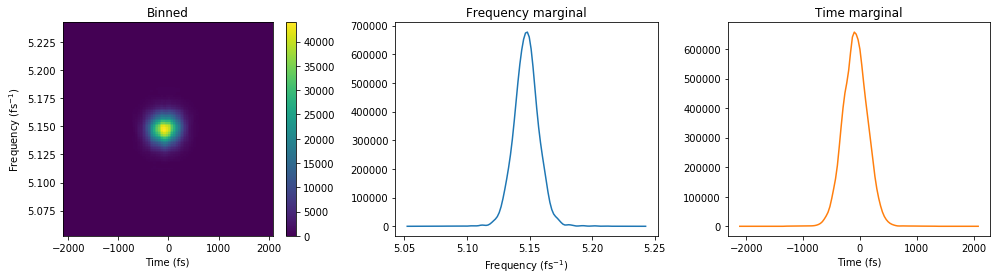

(100, 41)
(128, 128)


In [3]:
folder='experimentalData\\FROG\\Laser_732nm\\'
#print(len(listdir(folder)))
    
X,Y,Z=load_spectrogram(folder,'Laser_spectrogram',0,axes=[None,'frequency'],limits=[-3000,3000,5.0,5.3],skiprows=0)
Z=background_subtract_array(Z,5)
Z=low_pass_filter(Z,npad=30,rho=0.8)
#X,Y,Z=padnextpow2(X,Y,Z)

w0=np.sum(Y[:,0]*Z.sum(1))/np.sum(Z)
dw=np.diff(Y[:,0])[0]


Xb,Yb,Zb=binner(X,Y,Z,FROG_grid((0,33),k0=w0,n=128))
Zb=corner_suprresion(Zb,0.8*np.shape(Z)[0])
w0=np.sum(Yb[:,0]*Zb.sum(1))/np.sum(Zb)
dw=np.diff(Yb[:,0])[0]

plot_spectrogram_data(X,Y,Z)
plot_spectrogram_data(Xb,Yb,Zb,title='Binned')

print(X.shape)
print(Xb.shape)
#print(T.min(),T.max())


Iterations 150
FROG Error 0.014844132852543976


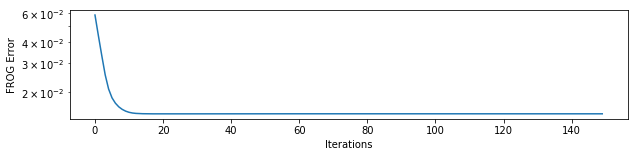

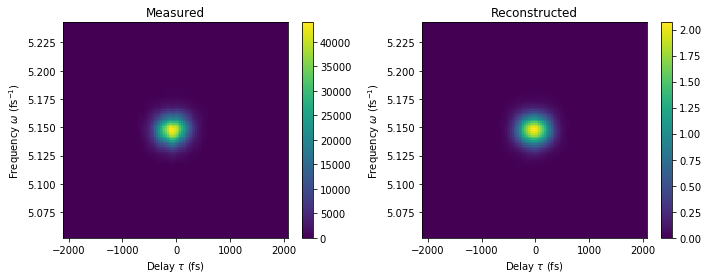

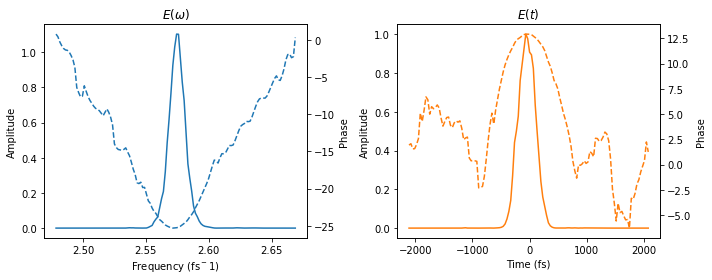

In [4]:
k,tk,Etk,wk,Ewk,Gk,Sk,EF=run_PCGP_FROG((Xb,Yb,Zb),max_iter=150,type='FROG',
                                       initial_guess=gauss(Xb[0,:],1,0,150,0)*np.exp(-1j*0.0001*Xb[0,:]**2))


In [5]:
pw=fit_gaussian((wk,np.abs(Ewk)**2)).x
pt=fit_gaussian((tk,np.abs(Etk)**2)).x
print(pt)

print('STD:\n',pw[2],pt[2])

print('TBP:',pt[2]*pw[2])

[ 1.02555614e+00 -4.81816240e+01  1.46423433e+02  1.82802856e-13]
STD:
 0.006513120616045794 146.42343279651354
TBP: 0.9536734788191682


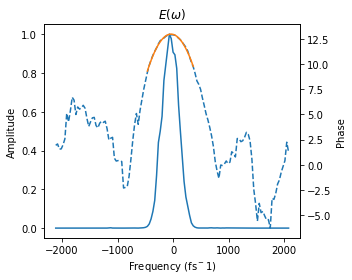

Optimal parameters:  [ 1.29683234e+01  4.34002101e-04 -2.01414869e-05  4.88023053e-10]


In [6]:
out=fit_phase(tk,(Etk),p0=[0,-0.0001,0,155,20],plot=True,cutoff=0.005)

In [7]:
Etgate=Etk

# 2018-05-11 XFROG Data for different compressor positions 

In [10]:
folder='experimentalData\\XFROG_CompressorScan\\'
files=listdir(folder)[0::1]
for i in range(len(files)):
    print(i,files[i])

0 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_105_gratingCompressor_25.txt
1 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_116_gratingCompressor_30.txt
2 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_126_gratingCompressor_35.txt
3 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_136_gratingCompressor_40.txt
4 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_146_gratingCompressor_45.txt
5 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_55_gratingCompressor_00.txt
6 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_65_gratingCompressor_05.txt
7 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_75_gratingCompressor_10.txt
8 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_85_gratingCompressor_15.txt
9 2018_05_16_laserSpectrogram-input_732nm_beforeFiber_58muW_gate_34mW_RR_85_gratingCom

0 Compressor_25


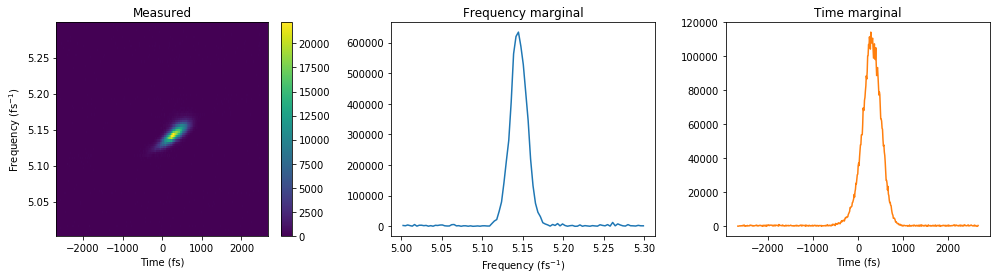

1 Compressor_30


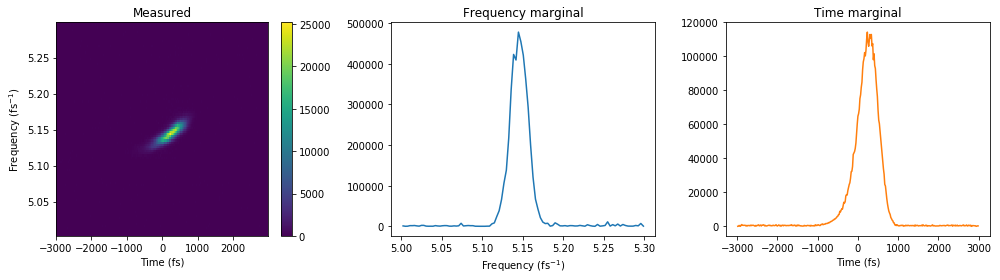

2 Compressor_35


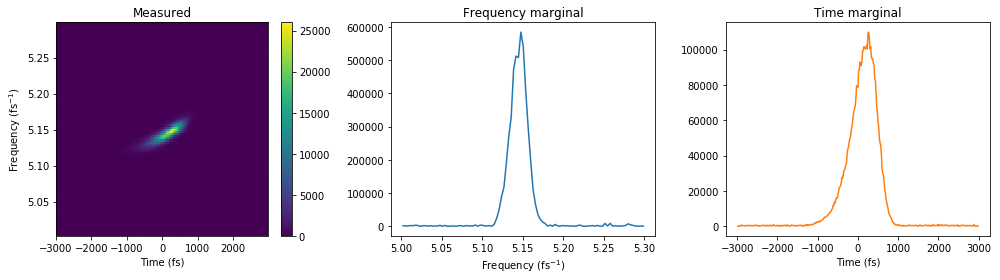

3 Compressor_40


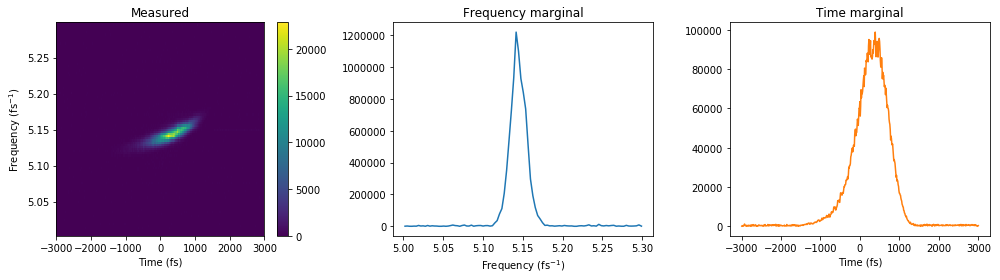

4 Compressor_45


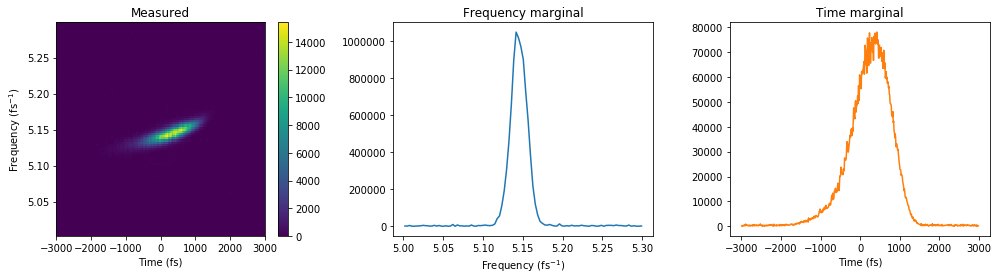

5 Compressor_00


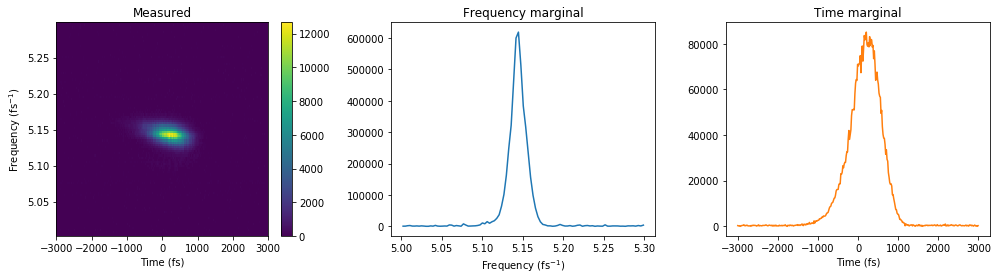

6 Compressor_05


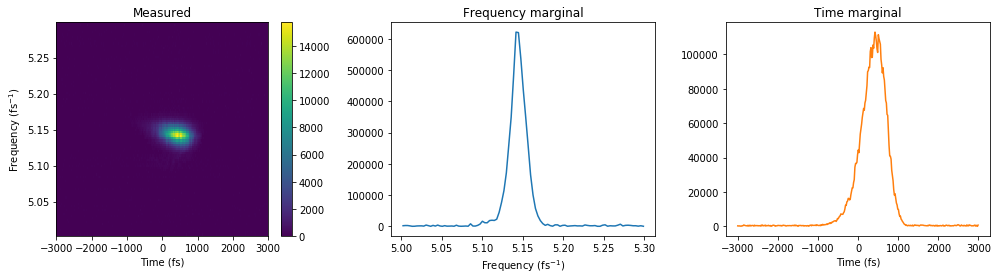

7 Compressor_10


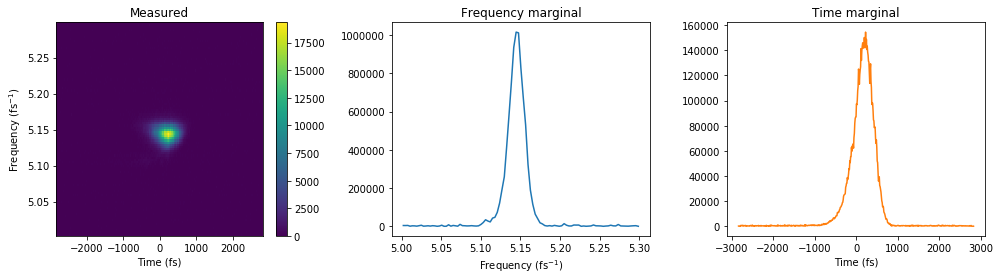

8 Compressor_15


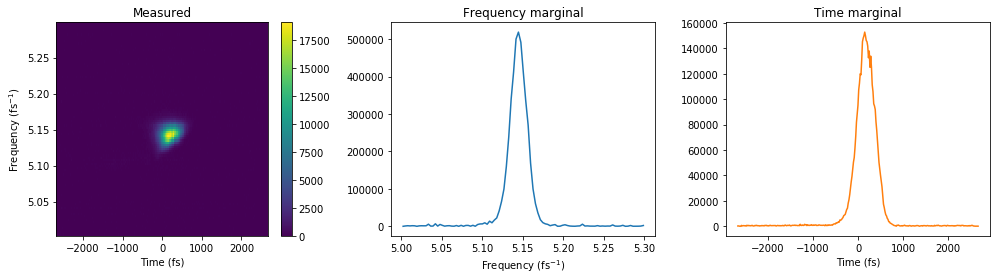

9 pressor_19-10


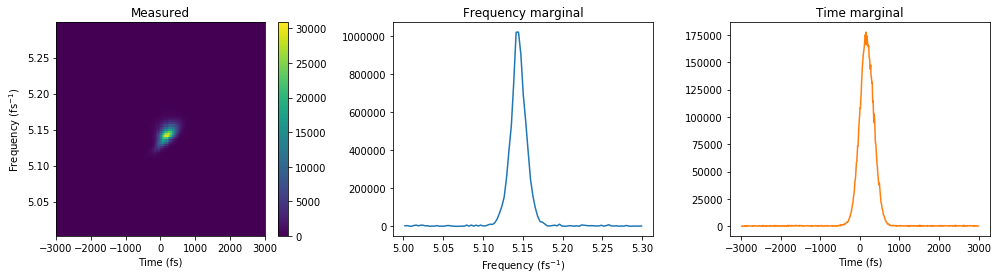

In [11]:
for n in range(len(files)):
    print(n,files[n][-17:-4])
    X,Y,Z=load_spectrogram(folder,files[n][-20:-4],0,limits=[-3000,3000,5.0,5.3],axes=['time','frequency'],background=False)
    Z=background_subtract_array(Z,5)
    plot_spectrogram_data(X,Y,Z)

## Reconstruction


 0 Compressor_25
Data:  (100, 534)
Bin size (128, 128)
Iterations 100
FROG Error 0.006128836332089337


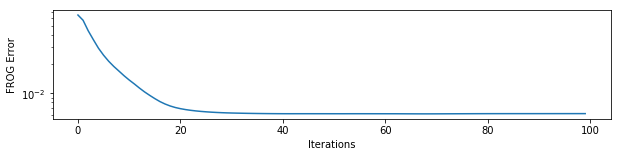

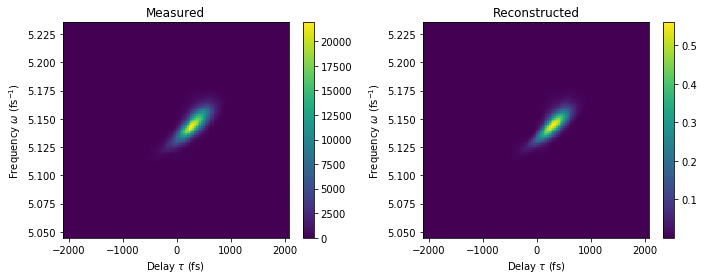

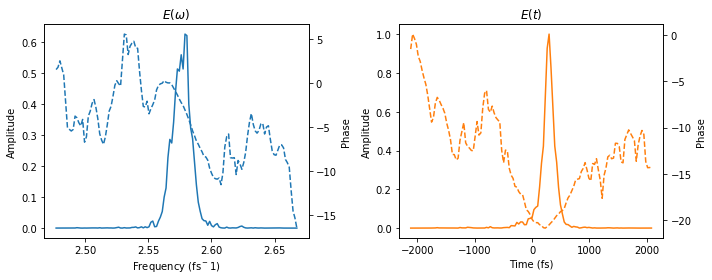

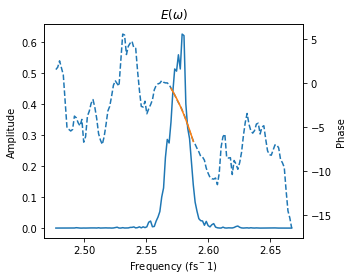

Optimal parameters:  [-2.25509837e+00 -2.98719490e+02 -5.87290993e+03 -4.77896673e+04]

 1 Compressor_30
Data:  (100, 359)
Bin size (128, 128)
Iterations 100
FROG Error 0.01056344099326425


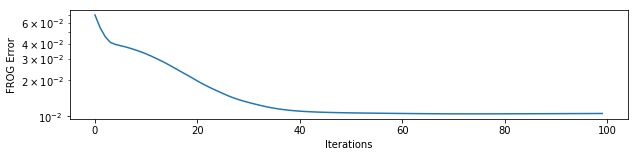

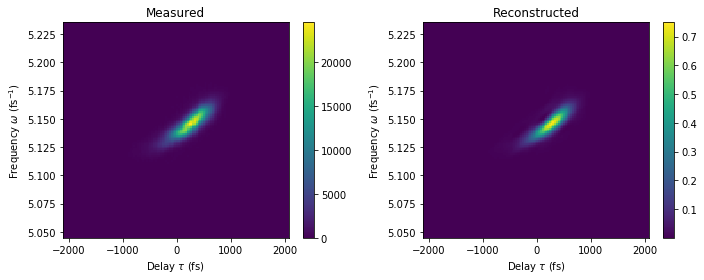

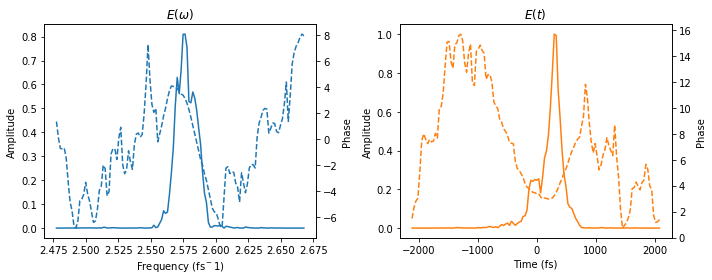

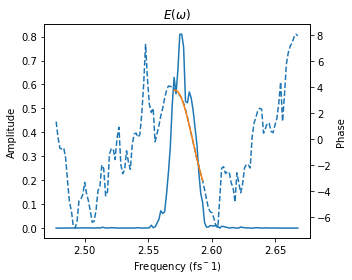

Optimal parameters:  [ 2.83505191e+00 -2.85819395e+02 -1.74680455e+04  7.04250856e+05]

 2 Compressor_35
Data:  (100, 359)
Bin size (128, 128)
Iterations 100
FROG Error 0.009993076877799318


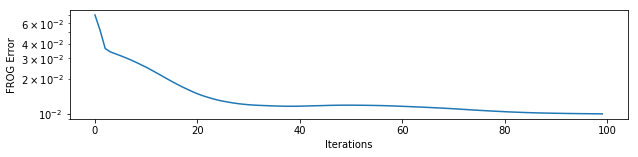

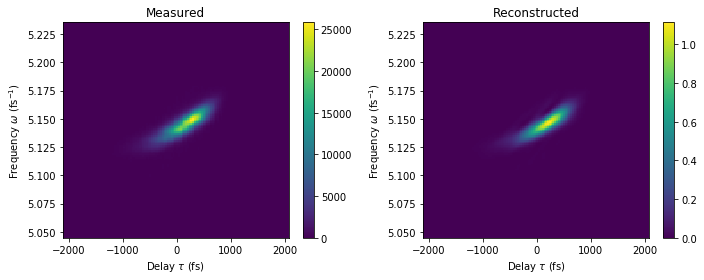

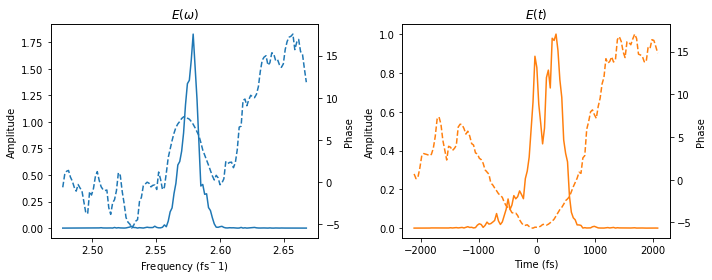

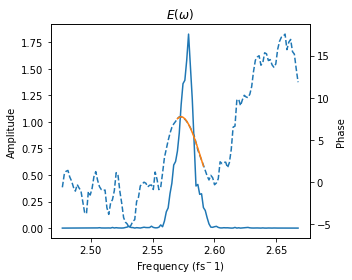

Optimal parameters:  [ 7.36048829e+00 -1.93080742e+02 -2.11207962e+04  5.27078812e+05]

 3 Compressor_40
Data:  (100, 600)
Bin size (128, 128)
Iterations 100
FROG Error 0.011149662066321262


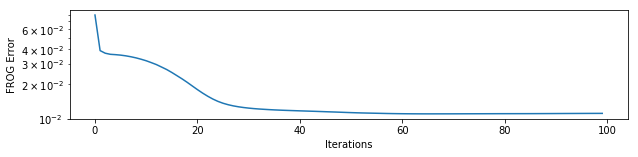

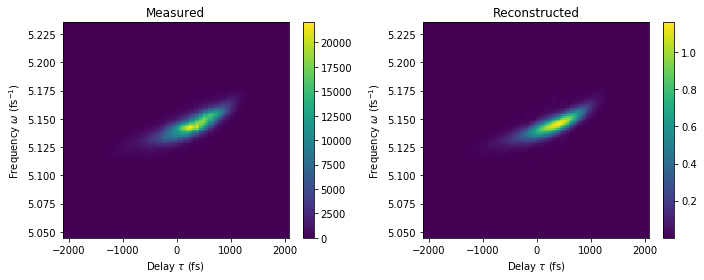

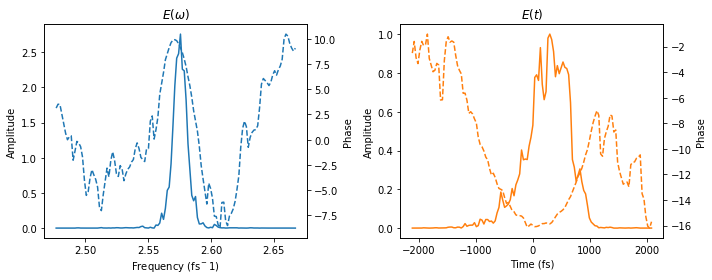

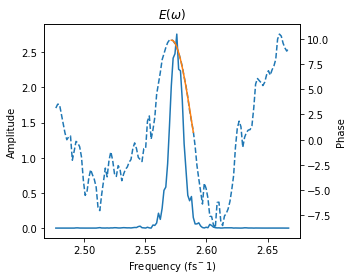

Optimal parameters:  [ 9.25717970e+00 -3.00084403e+02 -3.43879138e+04  8.11859875e+05]

 4 Compressor_45
Data:  (100, 599)
Bin size (128, 128)
Iterations 100
FROG Error 0.014959868155927506


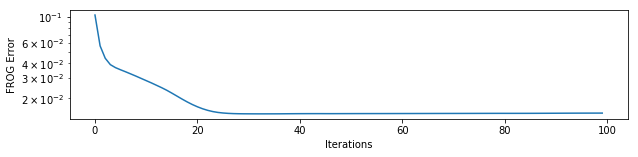

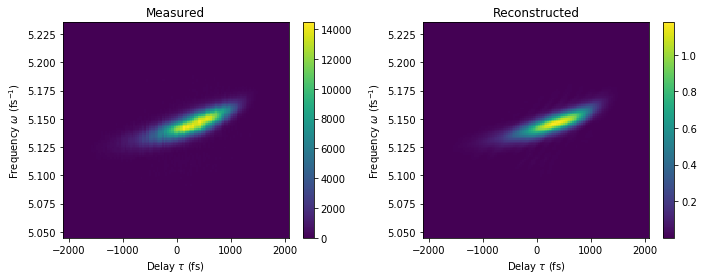

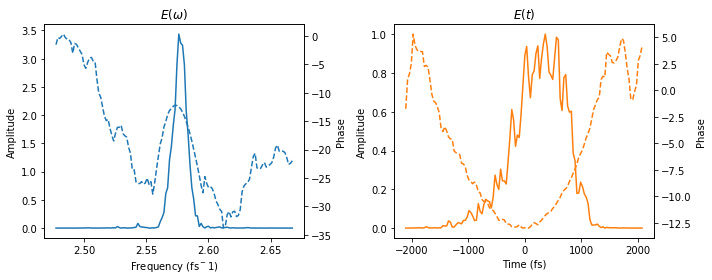

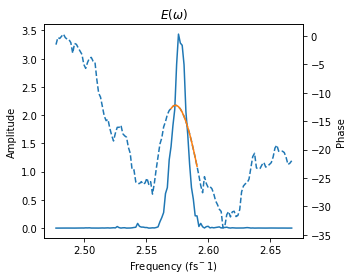

Optimal parameters:  [-1.26579244e+01 -2.81070349e+02 -3.93443266e+04  5.31751171e+05]

 5 Compressor_00
Data:  (100, 360)
Bin size (128, 128)
Iterations 100
FROG Error 0.009494810132952097


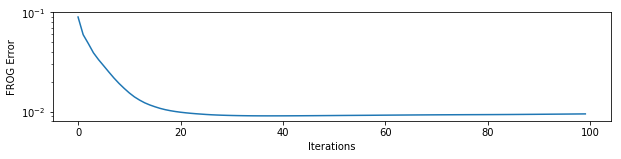

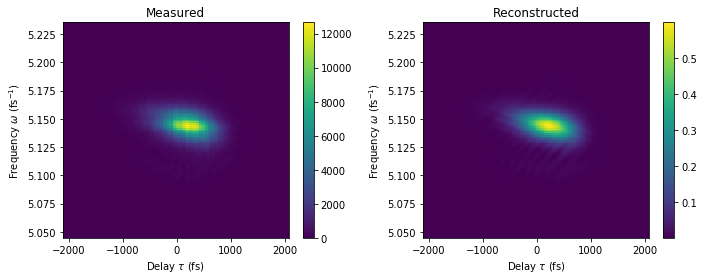

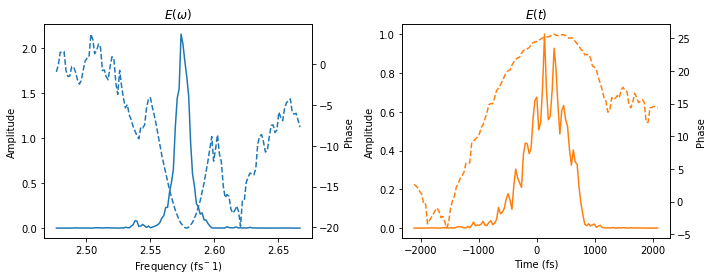

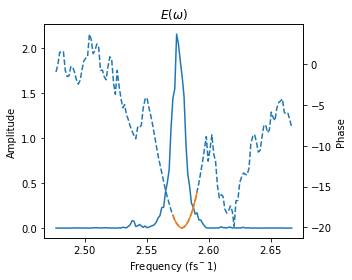

Optimal parameters:  [-1.98284147e+01 -1.70570903e+02  2.98596712e+04 -3.00335783e+04]

 6 Compressor_05
Data:  (100, 360)
Bin size (128, 128)
Iterations 100
FROG Error 0.007979963555642284


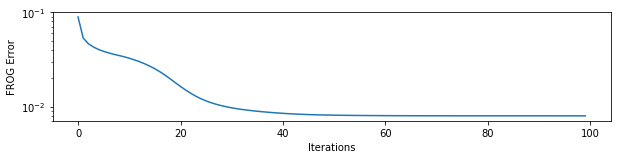

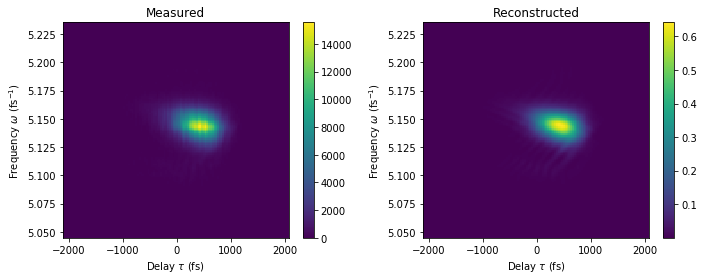

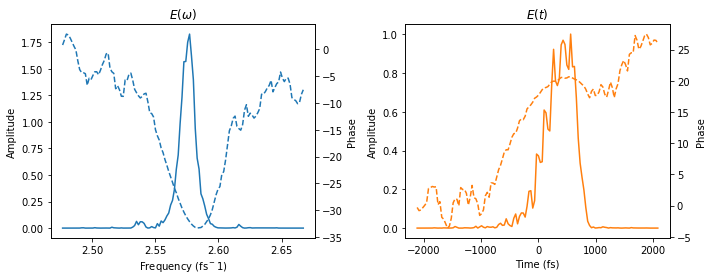

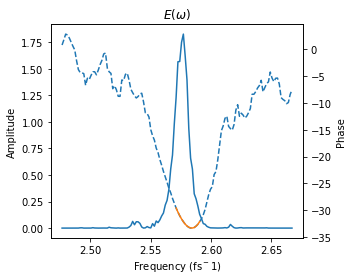

Optimal parameters:  [-3.16253020e+01 -3.80710618e+02  1.81431911e+04  3.19864541e+05]

 7 Compressor_10
Data:  (100, 567)
Bin size (128, 128)
Iterations 100
FROG Error 0.008856352596828205


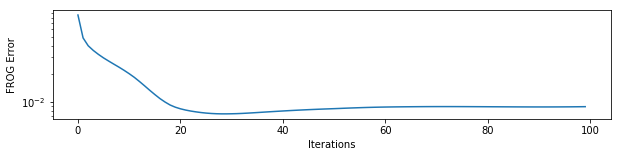

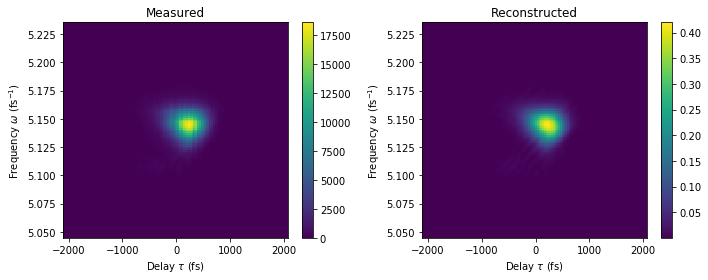

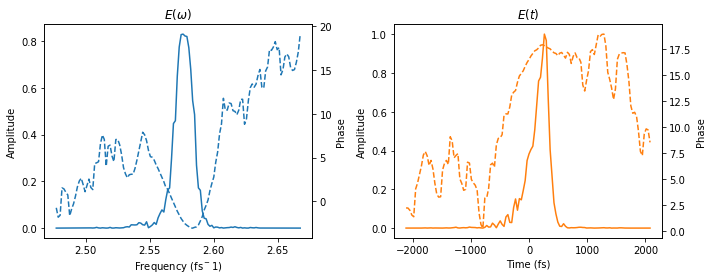

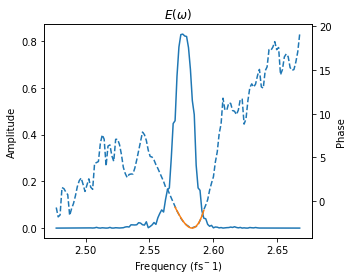

Optimal parameters:  [-2.33694902e+00 -2.03129281e+02  1.05450955e+04  4.49752597e+05]

 8 Compressor_15
Data:  (100, 321)
Bin size (128, 128)
Iterations 100
FROG Error 0.007720136203099995


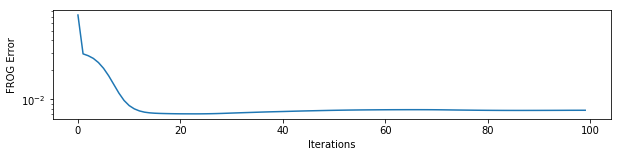

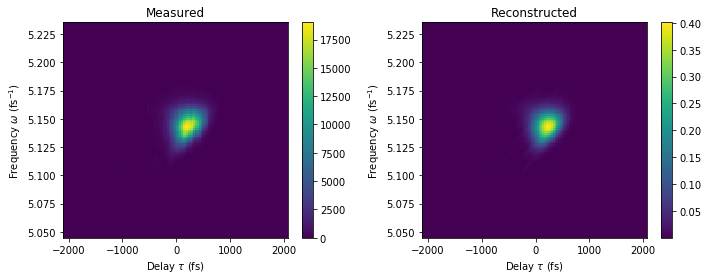

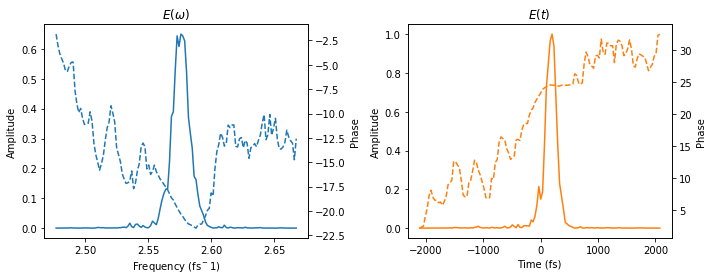

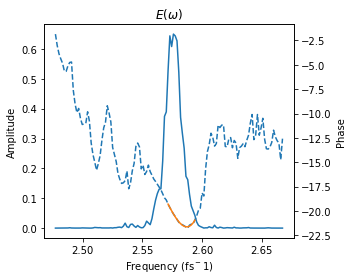

Optimal parameters:  [-2.03153098e+01 -2.06293567e+02  5.09285065e+03  2.44258614e+05]

 9 pressor_19-10
Data:  (100, 599)


In [ ]:
popt=np.zeros((len(files),4))
for n in range(len(files)):
    print('\n',n,files[n][-17:-4])

    #Data
    X,Y,Z=load_spectrogram(folder,files[n][-22:-3],0,limits=[-3000,3000,5.0,5.3],axes=['time','frequency'],background=False)
    Z=background_subtract_array(Z,10,nstd=1)
    print('Data: ',Z.shape)

    #Post-process
    Z=low_pass_filter(Z,npad=10,rho=0.8)

    #Bin
    Xb,Yb,Zb=binner(X,Y,Z,FROG_grid((0,33),k0=5.14,n=128))
    Zb=corner_suprresion(Zb,0.9*np.shape(Z)[0]//1)

    print('Bin size',Zb.shape)

    #Run
    #Egate=gauss(Xb[0,:],1,0,np.sqrt(2)*147,0)*np.exp(-1j*0.00001943*Xb[0,:]**2-1j*0.0015*Xb[0,:])
    Egate=(Etgate)
    k,tk,Etk,wk,Ewk,Gk,Sk,EF=run_PCGP_FROG((Xb,Yb,Zb),max_iter=100,type='XFROG',
                                           Egate=Egate,
                                           initial_guess='random',plots=True)
    popt[n,:]=fit_phase(wk,Ewk,p0=[10000,10000,0,2.58,0],plot=True,xlim=[2.57,2.60],cutoff=[0.15,0.10,0.10,0.05,0.05,0.05,0.05,0.05,0.05,0.05][n])

In [ ]:
x=np.array([0,5,10,15,19.1,25,30,35,40,45])
plt.figure()
plt.plot(x,popt[:,0])
plt.figure()
plt.plot(x,popt[:,1])
plt.show()

In [ ]:
fig,ax=plt.subplots(1,2)
ax2=ax.copy()
ax[0].plot(tk,np.abs(Etgate)**2)
ax2[0]=ax[0].twinx()
ax2[0].plot(tk,np.unwrap(np.angle(Etgate)),'--')
ax2[1]=ax[1].twinx()
ax[1].plot(tk,np.abs(Gk)**2)
ax2[1].plot(tk,np.unwrap(np.angle(Gk)))

plt.figure()
plt.plot(tk,np.unwrap(np.angle(Gk)))
plt.show()
print(fit_gaussian((tk,np.abs(Gk)**2)).x)
fit_phase(tk,Gk,plot=True,cutoff=0.01)
fidelity((Egate),Gk,x=tk)